# Comparison of QAOA CVaR (Max Cut)
In this notebook the QAOA method using the Conditional Value at risk (CVaR) is compared to the stadard QAOA for a max cut problem. 

In [1]:
from qaoa import QAOA, problems, mixers, initialstates

In [2]:
import numpy as np
import networkx as nx
import sys

sys.path.append("../")
from plotroutines import *

Create Barabási–Albert graph instance, more examples can be found here https://github.com/OpenQuantumComputing/data

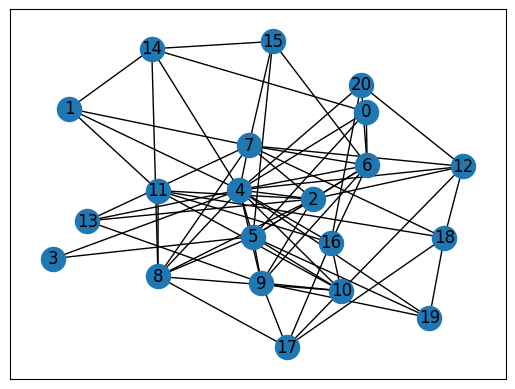

In [3]:
G = nx.read_gml("data/w_ba_n21_k4_0.gml")
nx.draw_networkx(G)
mincost = -25.23404480588015  # precalculated

Create QAOA instances with uniform superposition and X mixer. CVaR uses $\alpha=0.1$, i.e., only 10% best results

In [4]:
qaoa_CVaR = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.MaxCut(G=G),
    mixer=mixers.X(),
    cvar=0.1,
)
qaoa = QAOA(
    initialstate=initialstates.Plus(), problem=problems.MaxCut(G=G), mixer=mixers.X()
)

run optimization until given max depth

In [5]:
maxdepth = 10
qaoa.optimize(depth=maxdepth)
qaoa_CVaR.optimize(depth=maxdepth)

2023-09-29 14:49:15 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
1 0
2023-09-29 14:49:15 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2023-09-29 14:49:15 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2023-09-29 14:49:15 [info     ] Done execute                   file=qaoa.qaoa func=sample_cost_landscape
2023-09-29 14:58:22 [info     ] Done measurement               file=qaoa.qaoa func=sample_cost_landscape
2023-09-29 14:58:22 [info     ] Calculating Energy landscape done file=qaoa.qaoa func=sample_cost_landscape
2023-09-29 14:58:57 [info     ] cost(depth 1 = -19.81096848733997 file=qaoa.qaoa func=optimize
2023-09-29 15:00:47 [info     ] cost(depth 2 = -21.325165070616325 file=qaoa.qaoa func=optimize
2023-09-29 15:04:32 [info     ] cost(depth 3 = -22.135324174566907 file=qaoa.qaoa func=optimize
2023-09-29 15:09:33 [info     ] cost(depth 4 = -22.585202098

plot energy landscapes at depth $p=1$

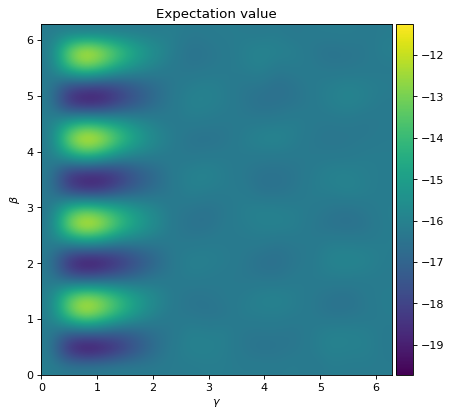

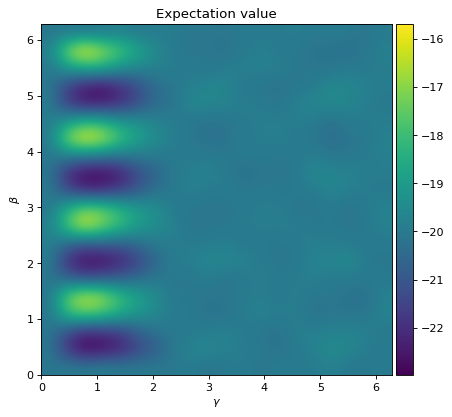

In [6]:
plot_E(qaoa)
plot_E(qaoa_CVaR)

plot approximation ratio

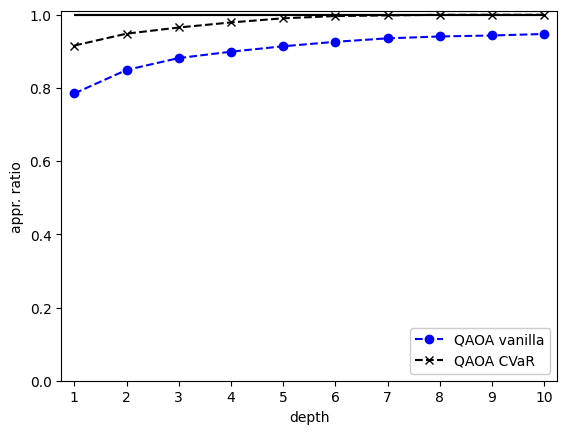

In [7]:
fig = pl.figure()
plot_ApproximationRatio(
    qaoa,
    maxdepth,
    mincost=mincost,
    maxcost=0,
    label="QAOA vanilla",
    style="o--b",
    fig=fig,
)
plot_ApproximationRatio(
    qaoa_CVaR,
    maxdepth,
    mincost=mincost,
    maxcost=0,
    label="QAOA CVaR",
    style="x--k",
    fig=fig,
)

plot how the expectation value changes during optimization

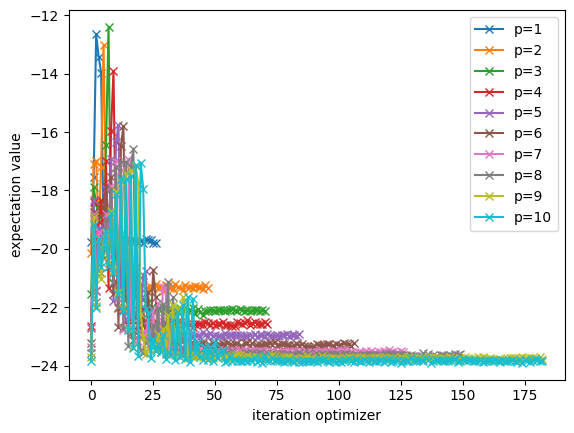

In [8]:
for i in range(maxdepth):
    pl.plot(qaoa.optimization_results[i + 1].Exp, "x-", label="p=" + str(i + 1))
_ = pl.legend()
_ = pl.ylabel("expectation value")
_ = pl.xlabel("iteration optimizer")